In [1]:
import torch
import os, sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.utils.data import DataLoader, Dataset

import numpy as np
import os, sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.dont_write_bytecode = True

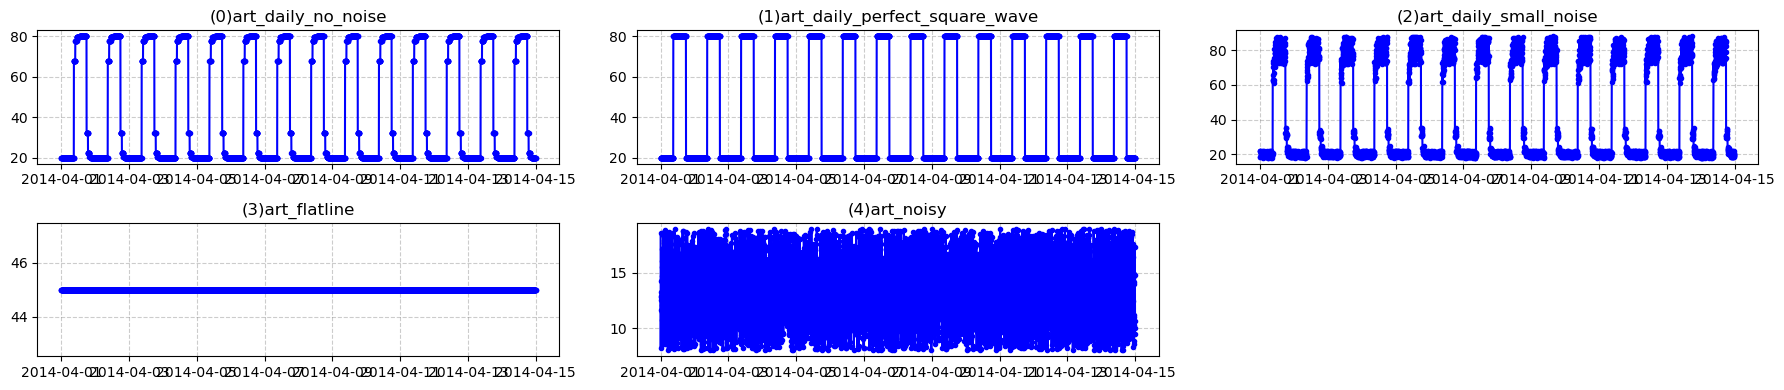

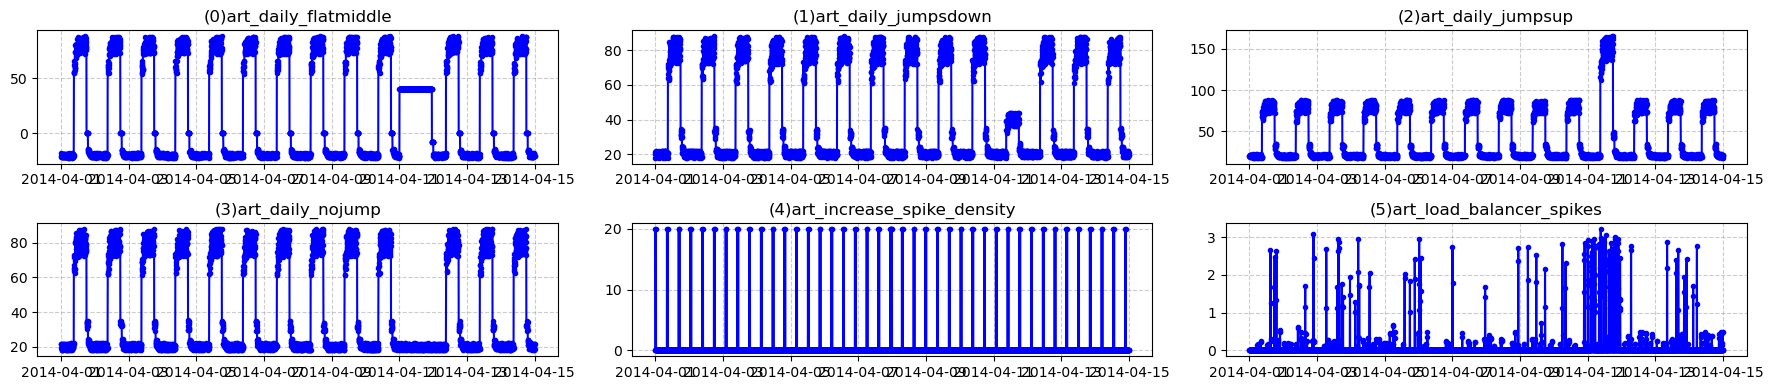

In [2]:
for path in ("./artificialNoAnomaly/", "./artificialWithAnomaly/"):
    files = os.listdir(path)
    cols = ["timestamp", "value"]
    N = len(files)
    n_cols = 3
    n_rows = N//n_cols if N%n_cols == 0 else N//n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (6*n_cols, 2*n_rows))
    axs = axs.reshape(-1, )
    for i in range(axs.shape[0]):
        try:
            ax = axs[i]
            file = files[i]
            filepath = path + file
            df = pd.read_csv(filepath)
            ax.set_title(f"({i})" +file.split(".")[0])
            ax.plot(pd.to_datetime(df[cols[0]]), df[cols[1]], color = "blue", marker = ".")
            ax.grid(color = "gray", linestyle = "--", alpha = .4)
        except IndexError:
            ax.axis("off")
    plt.tight_layout()
    plt.show()

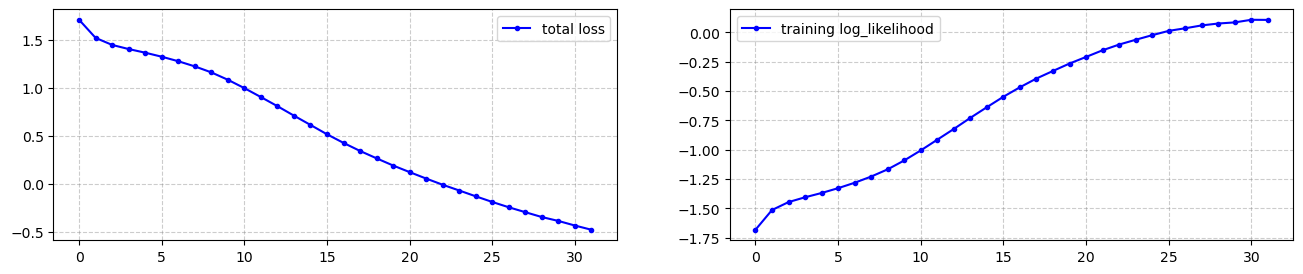

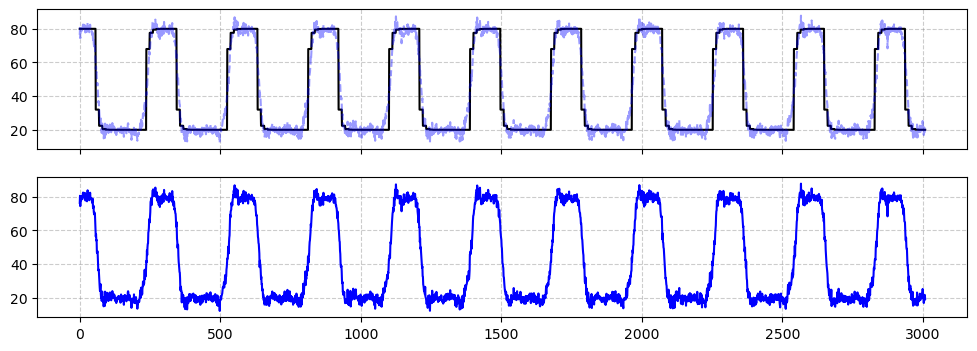

In [3]:
from model import FCVAE
path = "./artificialNoAnomaly/"
files = os.listdir(path)
cols = ["timestamp", "value"]
data = torch.tensor(pd.read_csv(path + files[0])[cols[1]].tolist(), dtype = torch.float32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
teacher = FCVAE(n_dim = 1024, n_hid1 = 512, n_hid2 = 256, n_seq = 128).to(device)
teacher.fit(data)

fig, ax = plt.subplots(2, 1, figsize = (12, 4), sharex=True)
recon = teacher(data)
ax[0].plot(data[-len(recon):], color = "black")
ax[0].plot(recon, color = "blue", linestyle = "--", alpha = .4)
ax[1].plot(recon, color = "blue", linestyle = "-")
ax[0].grid(linestyle = "--", color = "gray", alpha = .4)
ax[1].grid(linestyle = "--", color = "gray", alpha = .4)
plt.show()

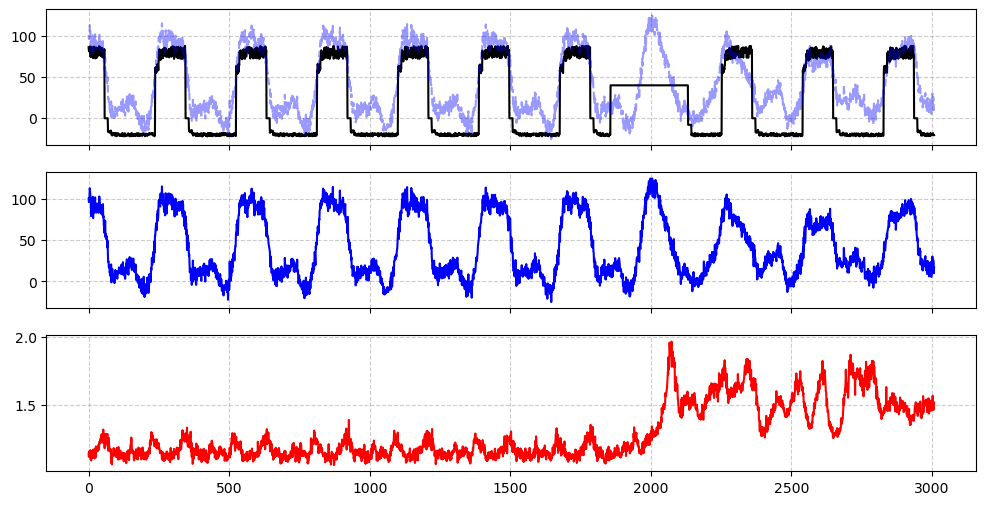

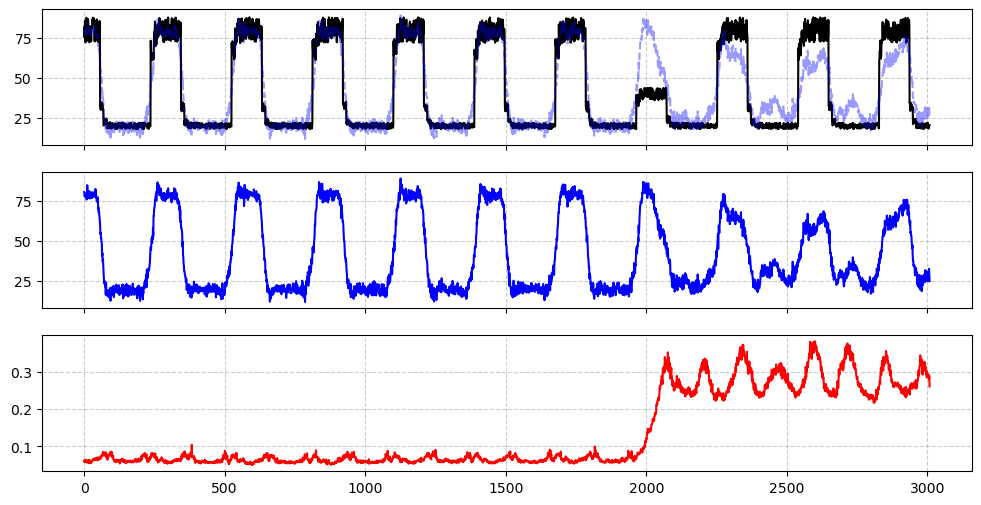

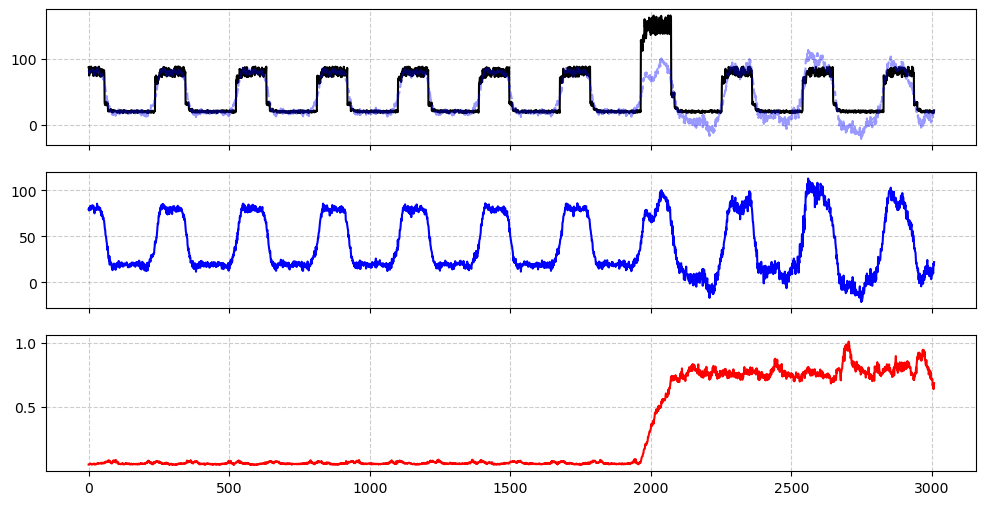

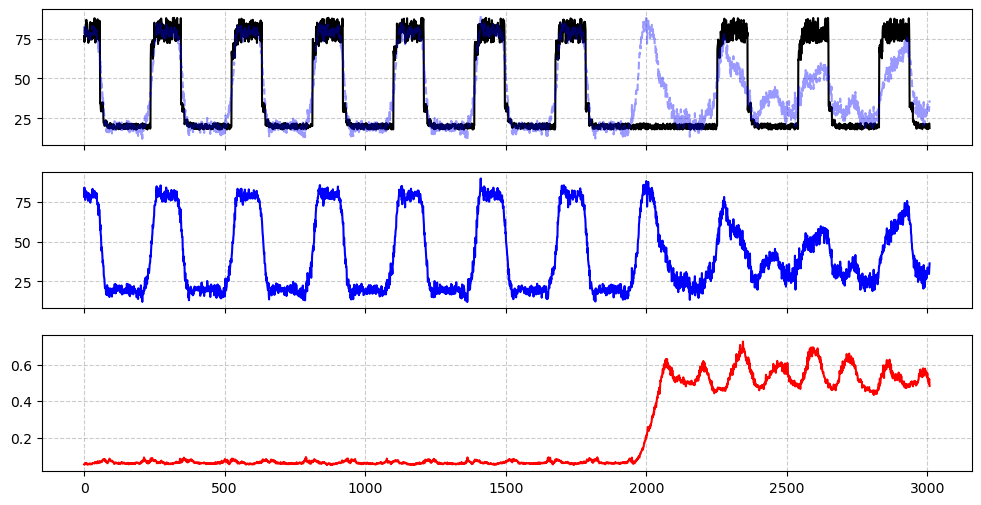

In [4]:
path = "./artificialWithAnomaly/"
files = os.listdir(path)
cols = ["timestamp", "value"]

for case in (0, 1, 2, 3):
    ts_data = torch.tensor(pd.read_csv(path + files[case])[cols[1]].tolist(), dtype = torch.float32)

    anomalies = teacher.anomaly(ts_data)
    recon = teacher(ts_data)

    fig, ax = plt.subplots(3, 1, figsize = (12, 6), sharex=True)
    ax[0].plot(ts_data[-len(recon):], color = "black")
    ax[0].plot(recon, color = "blue", linestyle = "--", alpha = .4)
    ax[1].plot(recon, color = "blue", linestyle = "-")
    ax[2].plot(anomalies, color = "red")
    ax[0].grid(linestyle = "--", color = "gray", alpha = .4)
    ax[1].grid(linestyle = "--", color = "gray", alpha = .4)
    ax[2].grid(linestyle = "--", color = "gray", alpha = .4)
    plt.show()